In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

from ImageProcessing import *
from ImageGenerator import ImageGenerator

In [2]:
width, height = 16, 16
a0, a1 = np.array([0, 5.7]), np.array([5.7, 0])
lattice_offset = np.array([2, 2])
lattice_shape = np.array([3, 3])
noise_mean = 0
noise_spread = 1
n_bright = 20
n_dark = 8
site_spread = 1.2

im_gen = ImageGenerator(width, height, a0, a1, lattice_offset, lattice_shape, noise_mean,
                         noise_spread, n_bright, n_dark, site_spread)

In [3]:
images, labels = im_gen.make(1)


456
[1. 1. 1. 0. 0. 1. 0. 0. 0.]


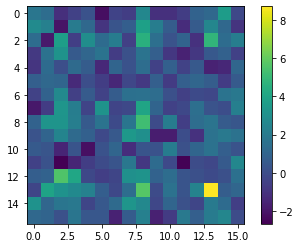

In [7]:
random_index = np.random.randint(images.shape[0])

print(random_index)

print(labels[random_index])

plt.imshow(images[random_index])
plt.colorbar()
plt.show()